___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [347]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
LendClub = pd.read_csv('loan_data.csv')
LendClub.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
LendClub.shape

(9578, 14)

In [53]:
# Проверка на пропущенные значения

LendClub.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
LendClub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
LendClub.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
# Количество значений для каждого из целевых классов

LendClub['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [9]:
# Нормализация целевой колонки для пересчета соотношения классов в процентах

norm_NotFullyPaid = (LendClub['not.fully.paid']
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index()
              )

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

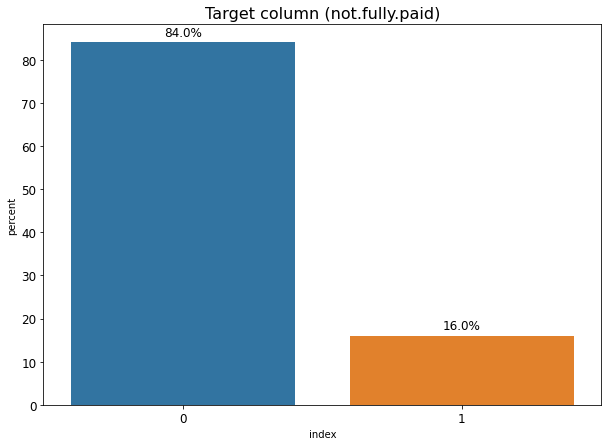

In [10]:
# Вывод на график процентное соотношение классов

plt.figure(figsize = (10, 7))
ax = sns.barplot(x = 'index', y = 'percent', data = norm_NotFullyPaid)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage, # текст
                (p.get_x() + p.get_width() / 2., p.get_height()), # координата xy
                ha = 'center', # центрирование
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points', # точка смещения относительно координаты
                fontsize = 12)
    
plt.title('Target column (not.fully.paid)', fontsize = 16)

plt.xlabel = ('not.fully.paid')
plt.ylabel = ('Проценты')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

0 - 84% возвращали кредит полностью
1 - 16% кредит вернули не весь

### Исследование зависимости кредитного рейтинга заемщика с фактом возврата кредита.

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600')])

<Figure size 1152x576 with 0 Axes>

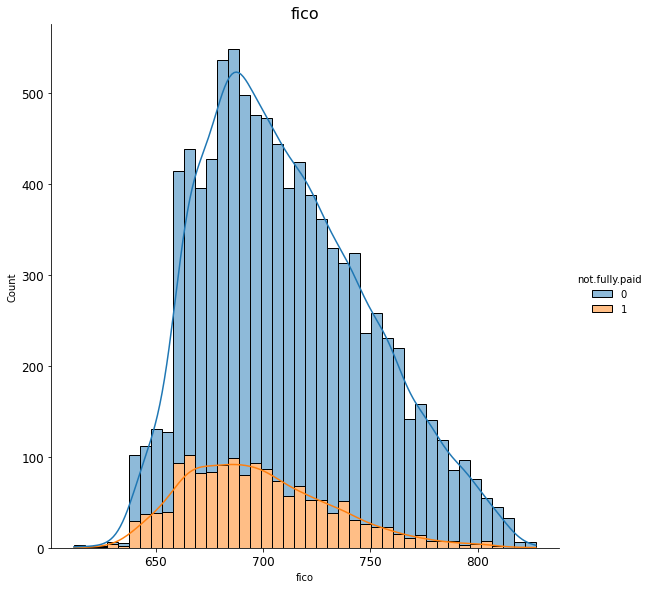

In [11]:
# с независимой нормализацией каждого подмножества

plt.figure(figsize = (16, 8))
sns.displot(LendClub, x = 'fico', hue='not.fully.paid', kde=True, multiple='stack', common_norm = False, height = 8)

plt.title('fico', fontsize = 16)
plt.xlabel = ('fico')
plt.ylabel = ('Density')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

Среди заемщиков с низким кредитным рейтином примерно 30% тех, что кредит не вернули.
Интересно, что среди заемщиков с очень высоким кредитным рейтингом (больше 770) тоже есть те, кто кредит не выплатили.

### 3. Тенденция между оценкой fico и процентной ставкой по кредиту int.rate

<Figure size 1152x576 with 0 Axes>

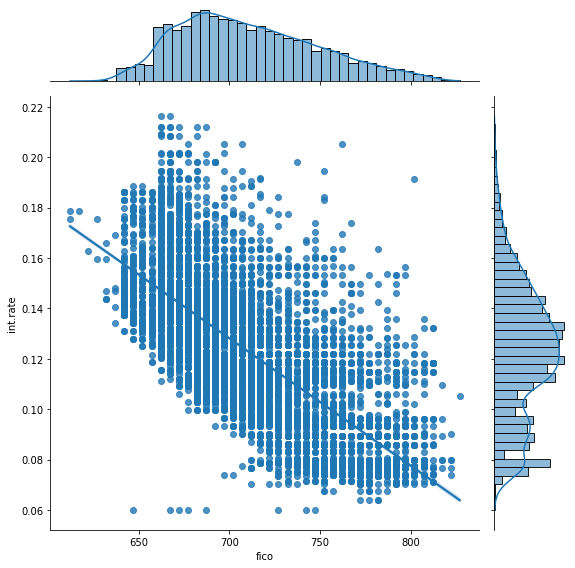

In [12]:
plt.figure(figsize=(16, 8))
sns.jointplot(data=LendClub, x = 'fico', y = 'int.rate', kind='reg', height = 8)

Прослеживается тенденция уменьшения процентной ставки по кредиту с увеличением кредитного рейтинга.
При этом видно, что не только кредитный рейтинг влияет на процентную ставку, т.к. есть ряд заемщикой с низким fico и максимально низким процентом по кредиту и заемщики с высоким fico и высоким процентом по кредиту.
Эти случаи можно исследовать дополнительно.

### 4. Тенденция между fico и процентной ставкой по кредиту int.rate для каждого из целевых классов

<Figure size 1152x576 with 0 Axes>

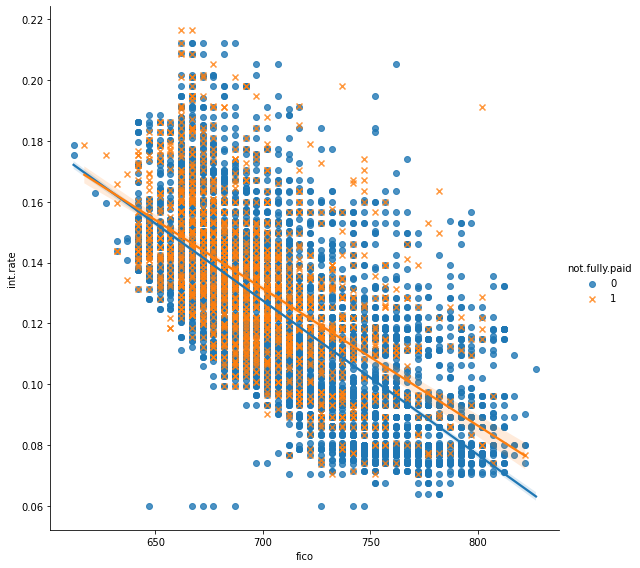

In [13]:
plt.figure(figsize = (16, 8))
sns.lmplot(x='fico', y='int.rate', data = LendClub, markers=['o', 'x'], hue='not.fully.paid', height = 8)

При сохранении обратнопропорциональной зависимости между fico и int.rate, для тех, кто кредит не выплатил, процентная ставка по кредиту в общем и целом выше, чем для тех, кто кредит выплатил.

<AxesSubplot:>

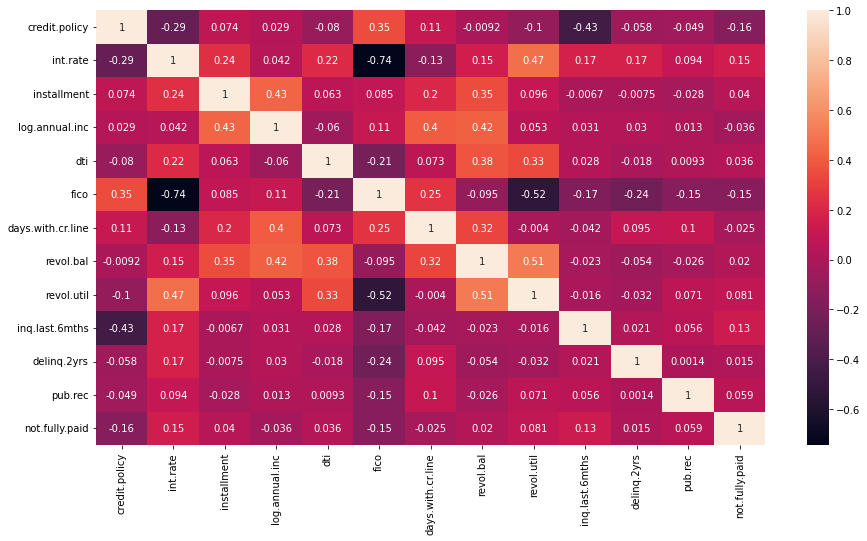

In [14]:
# Корреляция параметров

plt.figure(figsize=(15, 8))

sns.heatmap(LendClub.corr(method = 'spearman'), annot=True)

(array([600., 650., 700., 750., 800., 850.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

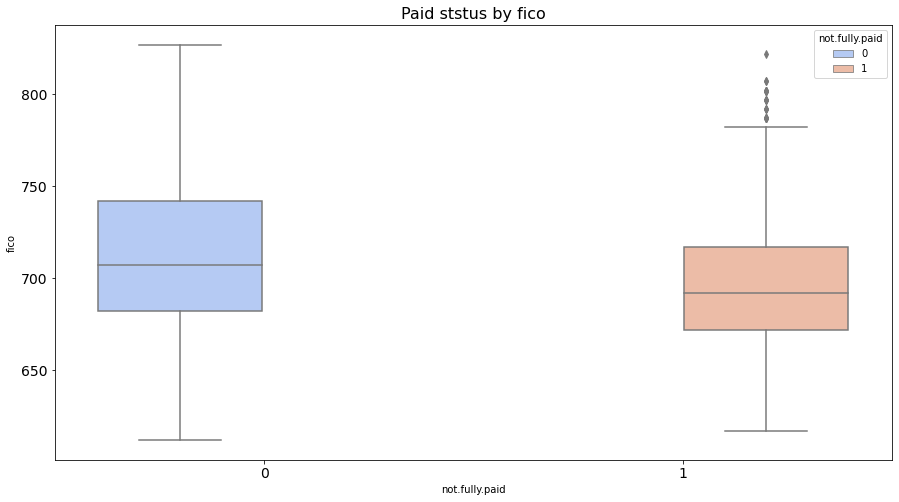

In [16]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'not.fully.paid', y = 'fico', hue='not.fully.paid', data = LendClub, palette="coolwarm")

plt.title('Paid ststus by fico', fontsize = 16)
plt.xlabel = ('Paid ststus')
plt.ylabel = ('fico rate')

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22, 0.24]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

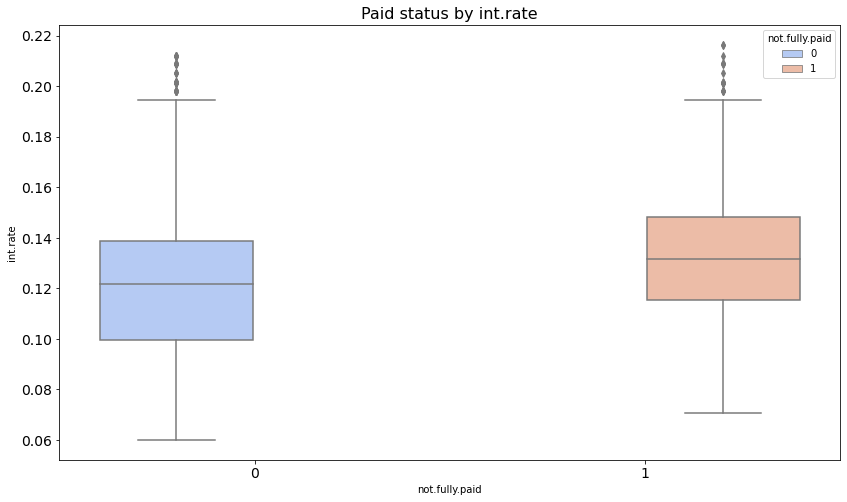

In [41]:
plt.figure(figsize=(14, 8))
sns.boxplot(x = 'not.fully.paid', y = 'int.rate', hue='not.fully.paid', data = LendClub, palette="coolwarm")

plt.title('Paid status by int.rate', fontsize = 16)
plt.xlabel = ('Paid status')
plt.ylabel = ('int.rate')

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [52]:
# Подсчет количества выбросов по int.rate

k = LendClub.loc[LendClub['int.rate'] >= 0.195, 'not.fully.paid'].value_counts()

print('Количество заемщиков (%) с процентом по кредиту больше 19.5: ', (k / LendClub.shape[0]) * 100)
print('Процент заемщиков с годовым доходом больше 12.5: ', (LendClub[LendClub['log.annual.inc'] <= 12.5].shape[0] / LendClub.shape[0]) * 100)

Количество заемщиков (%) с процентом по кредиту больше 19.5:  0    0.35498
1    0.17749
Name: not.fully.paid, dtype: float64


In [126]:
m = LendClub.loc[LendClub['int.rate'] <= 0.09, 'not.fully.paid'].value_counts()

print('Количество заемщиков (%) с процентом по кредиту меньше 9: ', (m / LendClub.shape[0]) * 100)

Количество заемщиков (%) с процентом по кредиту меньше 9:  0    14.240969
1     0.814366
Name: not.fully.paid, dtype: float64


Количество клиентов с процентной ставкой больше 19.5% очень мало (0.35% и 0.17% по каждому классу соответственно)
Количество заемщиков с процентной ставкой меньше 9% тоже небольшое (14% и 0.8%).
Т.к. целью является прогнозирование тех, кто не вернет кредит, то можно отбросить клиентов с процентом по кредиту меньше 9

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700')])

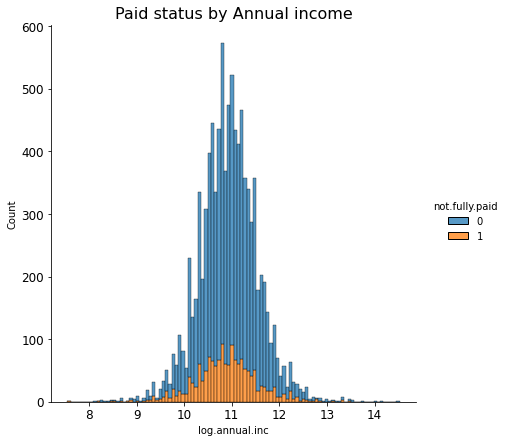

In [28]:
# Исследование зависимости между статусом выплаты и годовым доходом log.annual.inc

sns.displot(LendClub, x = 'log.annual.inc', hue='not.fully.paid', multiple='stack', common_norm = False, height = 6)

plt.title('Paid status by Annual income', fontsize = 16)
plt.xlabel = ('Annual income')
plt.ylabel = ('Counts')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [65]:
print('Процент заемщиков с годовым доходом меньше 9: ', (LendClub[LendClub['log.annual.inc'] <= 9].shape[0] / LendClub.shape[0]) * 100)
print('Процент заемщиков с годовым доходом больше 12.5: ', (LendClub[LendClub['log.annual.inc'] >= 12.5].shape[0] / LendClub.shape[0]) * 100)

Процент заемщиков с годовым доходом меньше 9:  0.42806431405303824
Процент заемщиков с годовым доходом больше 12.5:  0.9709751513885988


In [35]:
# Количество клентов с ежегодными доходом меньше 9 по каждому из классов

LendClub.loc[LendClub['log.annual.inc'] <= 9, 'not.fully.paid'].value_counts()

0    31
1    10
Name: not.fully.paid, dtype: int64

In [66]:
# Количество клентов с ежегодными доходом больше 12.5 по каждому из классов

LendClub.loc[LendClub['log.annual.inc'] >= 12.5, 'not.fully.paid'].value_counts()

0    74
1    19
Name: not.fully.paid, dtype: int64

Среди заемщиков с годовым доходом больше 12.5 не выплатили кредит 19 чел., почти в 2 раза больше, чем среди заемщиков с годовым доходом меньше 9.

In [ ]:
# Иссдедование dti (отношений долга по кредиру у доходу) по отношению к статусу по кредитам.

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600')])

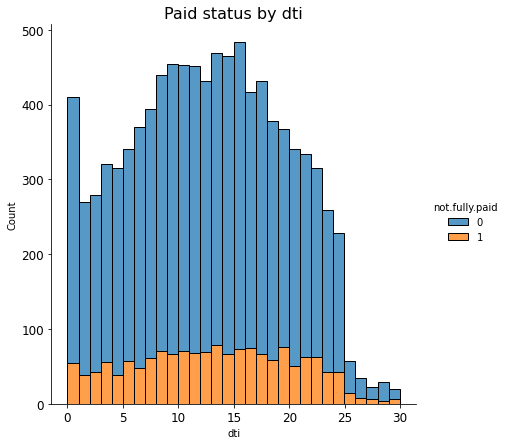

In [67]:
sns.displot(LendClub, x = 'dti', hue='not.fully.paid', multiple='stack', common_norm = False, height = 6)

plt.title('Paid status by dti', fontsize = 16)
plt.xlabel = ('Paid status')
plt.ylabel = ('dti Distribution')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [79]:
LendClub[LendClub['dti'] >= 25].shape

(155, 14)

In [80]:
LendClub.loc[LendClub['dti'] >= 25, 'not.fully.paid'].value_counts()

0    116
1     39
Name: not.fully.paid, dtype: int64

Интересно, что среди заемщиков с высоким dti (больше 25) почти четверь кредит не выплатили.

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400'),
  Text(0, 1600.0, '1600')])

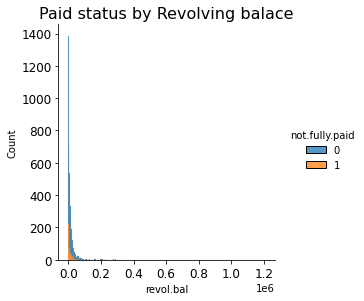

In [82]:
# Исследование зависимости от кредитного остатка заемщика на конец отчетого периода

sns.displot(LendClub, x = 'revol.bal', hue='not.fully.paid', multiple='stack', common_norm = False, height = 4)

plt.title('Paid status by Revolving balace', fontsize = 16)
plt.xlabel = ('Revolving balace')
plt.ylabel = ('Count')

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [102]:
LendClub.loc[LendClub['revol.bal'] >= 250000, 'not.fully.paid'].value_counts()

0    20
1     6
Name: not.fully.paid, dtype: int64

In [105]:
LendClub.loc[LendClub['revol.bal'] >= 100000, 'not.fully.paid'].value_counts()

0    148
1     57
Name: not.fully.paid, dtype: int64

In [274]:
# Создание копии основного набора данных

LendClubCopy = LendClub.copy()

In [275]:
# Удаление выбросов

print(LendClubCopy.shape)

LendClubCopy = LendClubCopy[LendClubCopy['log.annual.inc'] >= 9]
LendClubCopy = LendClubCopy[LendClubCopy['log.annual.inc'] <= 12.5]
LendClubCopy = LendClubCopy[LendClubCopy['revol.bal'] <= 250000]
LendClubCopy = LendClubCopy[LendClubCopy['int.rate'] >= 0.09]
LendClubCopy = LendClubCopy[LendClubCopy['int.rate'] <= 0.195]

print(LendClubCopy.shape)

(9578, 14)
(7960, 14)


In [276]:
# Определение весов классов

w_pos = LendClubCopy['not.fully.paid'].value_counts()[1] / LendClubCopy.shape[0]
w_neg = LendClubCopy['not.fully.paid'].value_counts()[0] / LendClubCopy.shape[0]

print(f'Вес Positive values {w_pos}')
print(f'Вес Negative values {w_neg}')

Вес Positive values 0.17688442211055277
Вес Negative values 0.8231155778894472


In [265]:
LendClubCopyX = LendClubCopy.drop('not.fully.paid', axis=1)
y = LendClubCopy['not.fully.paid']

In [266]:
# кодирование категориальных колонок в числовые

X = pd.get_dummies(LendClubCopyX, columns=['purpose'], drop_first=True)

#### Разделение на трейн и тест наборы

In [209]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, log_loss,
    confusion_matrix, classification_report, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)

In [280]:
#!pip install imblearn

In [288]:
y.value_counts()

0    6552
1    1408
Name: not.fully.paid, dtype: int64

In [284]:
# Применение оверсемплинга, чтобы сбалансировать классы

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)

In [289]:
y_sm.value_counts()

0    6552
1    6552
Name: not.fully.paid, dtype: int64

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=42)

In [292]:
# Стандартизация данных

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [293]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.int32)
y_test = np.array(y_test).astype(np.int32)

### Построение моделей

### Модель XGBoost

In [179]:
import xgboost as xgb

In [360]:
xgb_clf = xgb.XGBClassifier(subsample = 0.5, random_state=42)

In [361]:
xgb_clf.fit(X_train, y_train, eval_metric='logloss')

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)
y_score = xgb_clf.predict_proba(X_test)[:, 1]

In [362]:
print('confusion_matrix:')

print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

confusion_matrix:
[[4789  118]
 [ 283 4638]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1645
           1       0.84      0.83      0.84      1631

    accuracy                           0.84      3276
   macro avg       0.84      0.84      0.84      3276
weighted avg       0.84      0.84      0.84      3276



In [363]:
# Создание датафрейма с результатми работы моделей

metric = pd.DataFrame(index=['accuracy', 'roc-auc', 'precision', 'recall', 'f1', 'logloss'])

metric['xgboost'] = [accuracy_score(y_test, y_test_pred),
                        roc_auc_score(y_test, y_score),
                        precision_score(y_test, y_test_pred),
                        recall_score(y_test, y_test_pred),
                        f1_score(y_test, y_test_pred),
                        log_loss(y_test, y_test_pred)]
metric

,xgboost
accuracy,0.838523
roc-auc,0.913477
precision,0.844806
recall,0.827713
f1,0.836172
logloss,5.577293


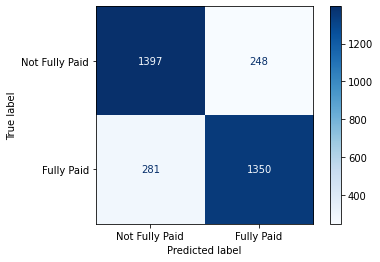

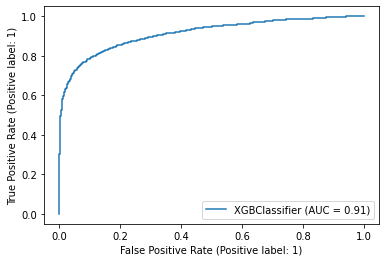

In [364]:
disp = plot_confusion_matrix(
                        xgb_clf, X_test, y_test,
                        cmap = 'Blues', values_format='d',
                        display_labels = ['Not Fully Paid', 'Fully Paid']
)

disp = plot_roc_curve(xgb_clf, X_test, y_test)

### Алгоритм RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [366]:
RF_clf = RandomForestClassifier(min_samples_split=100, n_estimators = 500, random_state=42)
                                
RF_clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=100, n_estimators=500, random_state=42)

In [367]:
y_train_pred = RF_clf.predict(X_train)
y_test_pred = RF_clf.predict(X_test)
y_score = RF_clf.predict_proba(X_test)[:, 1]

In [368]:
metric['RF_clf'] = [accuracy_score(y_test, y_test_pred),
                        roc_auc_score(y_test, y_score),
                        precision_score(y_test, y_test_pred),
                        recall_score(y_test, y_test_pred),
                        f1_score(y_test, y_test_pred),
                        log_loss(y_test, y_test_pred)]
metric

,xgboost,RF_clf
accuracy,0.838523,0.785714
roc-auc,0.913477,0.866360
precision,0.844806,0.820124
recall,0.827713,0.729614
f1,0.836172,0.772226
logloss,5.577293,7.401230


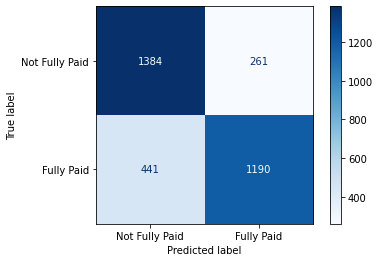

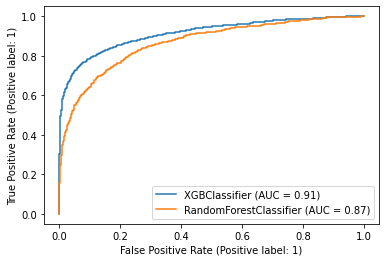

In [369]:
disp = plot_confusion_matrix(
    RF_clf, X_test, y_test,
    cmap = 'Blues', values_format='d',
    display_labels = ['Not Fully Paid', 'Fully Paid']
)

disp = plot_roc_curve(xgb_clf, X_test, y_test)
plot_roc_curve(RF_clf, X_test, y_test, ax=disp.ax_)

### Модель Дерево решений

In [312]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [371]:
DT_clf = DecisionTreeClassifier(max_depth=100, random_state=42)

DT_clf.fit(X_train, y_train)

y_train_pred = DT_clf.predict(X_train)
y_test_pred = DT_clf.predict(X_test)
y_score = DT_clf.predict_proba(X_test)[:, 1]

In [372]:
metric['DT_clf'] = [accuracy_score(y_test, y_test_pred),
                        roc_auc_score(y_test, y_score),
                        precision_score(y_test, y_test_pred),
                        recall_score(y_test, y_test_pred),
                        f1_score(y_test, y_test_pred),
                        log_loss(y_test, y_test_pred)]
metric

,xgboost,RF_clf,DT_clf
accuracy,0.838523,0.785714,0.748779
roc-auc,0.913477,0.866360,0.748854
precision,0.844806,0.820124,0.738771
recall,0.827713,0.729614,0.766401
f1,0.836172,0.772226,0.752332
logloss,5.577293,7.401230,8.676974


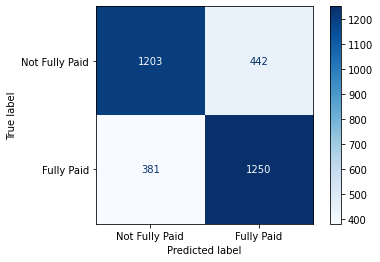

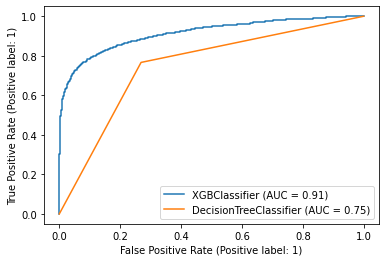

In [373]:
disp = plot_confusion_matrix(
    DT_clf, X_test, y_test,
    cmap = 'Blues', values_format='d',
    display_labels = ['Not Fully Paid', 'Fully Paid']
)

disp = plot_roc_curve(xgb_clf, X_test, y_test)
plot_roc_curve(DT_clf, X_test, y_test, ax=disp.ax_)

### Логистическая регрессия

In [375]:
LReg = LogisticRegression(random_state = 42)

LReg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [376]:
print('score на трейне', LReg.score(X_train, y_train))
print('score на тесте', LReg.score(X_test, y_test))

score на трейне 0.742979242979243
score на тесте 0.7408424908424909


In [377]:
y_train_pred = LReg.predict(X_train)
y_test_pred = LReg.predict(X_test)
y_score = LReg.predict_proba(X_test)[:, 1]

In [378]:
metric['LReg'] = [accuracy_score(y_test, y_test_pred),
                        roc_auc_score(y_test, y_score),
                        precision_score(y_test, y_test_pred),
                        recall_score(y_test, y_test_pred),
                        f1_score(y_test, y_test_pred),
                        log_loss(y_test, y_test_pred)]
metric

,xgboost,RF_clf,DT_clf,LReg
accuracy,0.838523,0.785714,0.748779,0.740842
roc-auc,0.913477,0.866360,0.748854,0.810176
precision,0.844806,0.820124,0.738771,0.733294
recall,0.827713,0.729614,0.766401,0.753525
f1,0.836172,0.772226,0.752332,0.743272
logloss,5.577293,7.401230,8.676974,8.951092


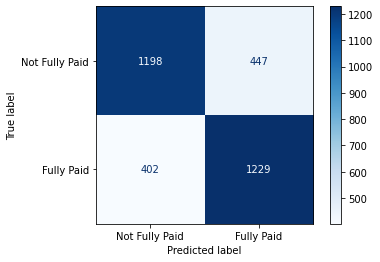

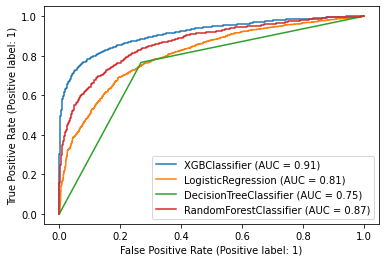

In [379]:
disp = plot_confusion_matrix(
    LReg, X_test, y_test,
    cmap = 'Blues', values_format='d',
    display_labels = ['Not Fully Paid', 'Fully Paid']
)

disp = plot_roc_curve(xgb_clf, X_test, y_test)
plot_roc_curve(LReg, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DT_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(RF_clf, X_test, y_test, ax=disp.ax_)

### Ансамбль моделей Voting

In [386]:
clf1 = LogisticRegression(random_state = 1)
clf2 = DecisionTreeClassifier(max_depth=100, random_state=1)
clf3 = RandomForestClassifier(min_samples_split=100, n_estimators = 500, random_state=1)
clf4 = xgb.XGBClassifier(subsample = 0.5, random_state=1, eval_metric='logloss')

In [387]:
en_clf = VotingClassifier(estimators = [
    ('lr', clf1), ('dtrf', clf2), ('rf', clf3), ('xg', clf4)], voting='soft')
                                   
en_clf = en_clf.fit(X_train, y_train)

In [388]:
y_train_pred = en_clf.predict(X_train)
y_test_pred = en_clf.predict(X_test)
y_score = en_clf.predict_proba(X_test)[:, 1]

In [389]:
metric['Voting'] = [accuracy_score(y_test, y_test_pred),
                        roc_auc_score(y_test, y_score),
                        precision_score(y_test, y_test_pred),
                        recall_score(y_test, y_test_pred),
                        f1_score(y_test, y_test_pred),
                        log_loss(y_test, y_test_pred)]
metric

,xgboost,RF_clf,DT_clf,LReg,Voting
accuracy,0.838523,0.785714,0.748779,0.740842,0.815324
roc-auc,0.913477,0.866360,0.748854,0.810176,0.888675
precision,0.844806,0.820124,0.738771,0.733294,0.820625
recall,0.827713,0.729614,0.766401,0.753525,0.805028
f1,0.836172,0.772226,0.752332,0.743272,0.812751
logloss,5.577293,7.401230,8.676974,8.951092,6.378568


## Выводы:

Самые высокие показатели дает использование модели XGBClassifier
roc-auc - 0.91
accuracy - 0.838
precision - 0.844
f1 - 0.836

### Завдання 2:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [7]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [4]:
df = pd.read_csv('air_quality_no2_long.csv')

In [5]:
df.head(5)

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [10]:
print('1. Виведіть список унікальних міст з датасету: ')
df['city'].unique()

1. Виведіть список унікальних міст з датасету: 


array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [14]:
print('Виведіть дату початку та кінця введення даних: ')
print('Дата начала:', pd.to_datetime(df['date.utc']).min().strftime('%d-%m-%y'))
print('Дата конца:', pd.to_datetime(df['date.utc']).max().strftime('%d-%m-%y'))

Виведіть дату початку та кінця введення даних: 
Дата начала: 07-05-19
Дата конца: 21-06-19


In [16]:
df['wd'] = pd.to_datetime(df['date.utc']).dt.day_name()

In [26]:
print('Яка середня конценрація  𝑁𝑂2  для кожного дня тижня і міста (виведіть таблицю)')
df.groupby(['wd', 'city'])['value'].mean()

Яка середня конценрація  𝑁𝑂2  для кожного дня тижня і міста (виведіть таблицю)


wd         city     
Friday     Antwerpen    28.400000
           London       26.446809
           Paris        31.617986
Monday     Antwerpen    27.875000
           London       23.969697
           Paris        24.856250
Saturday   Antwerpen    33.500000
           London       24.977612
           Paris        25.266154
Sunday     Antwerpen    21.896552
           London       24.859155
           Paris        23.274306
Thursday   Antwerpen    27.500000
           London       24.780142
           Paris        28.600690
Tuesday    Antwerpen    22.214286
           London       24.885714
           Paris        30.999359
Wednesday  Antwerpen    21.125000
           London       23.460432
           Paris        29.165753
Name: value, dtype: float64

In [22]:
df['hour'] = pd.to_datetime(df['date.utc']).dt.hour

In [ ]:
dfn = df.groupby(['hour']).mean()
dfn = dfn.reset_index()

4. Яке середнє значення NO_2 для кожної години (виведіть стовбчикову діаграму)


(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

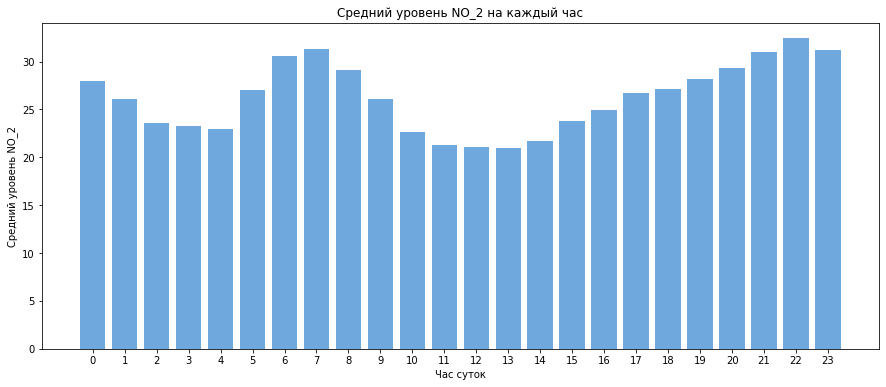

In [55]:
print('4. Яке середнє значення NO_2 для кожної години (виведіть стовбчикову діаграму)')

fig, ax = plt.subplots(figsize=(15, 6))
plt.bar(dfn['hour'], dfn['value'], color='#6fa8dc')
ax.set_title('Средний уровень NO_2 на каждый час')
ax.set_xlabel('Час суток')
ax.set_ylabel('Средний уровень NO_2')
plt.xticks(dfn['hour'], fontsize = 10)
plt.yticks(fontsize = 10)
